In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

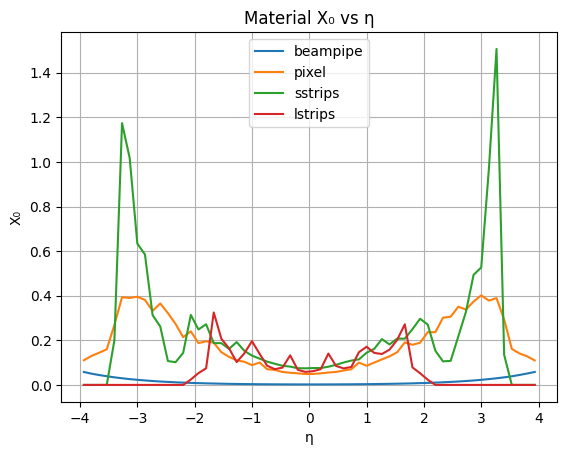

In [2]:
# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material_composition.root")


names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
}

plt.figure()

for label, key in names.items():
    h = f[key]
    eta = h.axis().edges()
    x0 = h.values()
    eta_centers = 0.5 * (eta[1:] + eta[:-1])
    plt.plot(eta_centers, x0, label=label)

plt.xlabel("η")
plt.ylabel("X₀")
plt.title("Material X₀ vs η")
plt.legend()
plt.grid(True)
plt.savefig("x0_vs_eta.png")
plt.show()


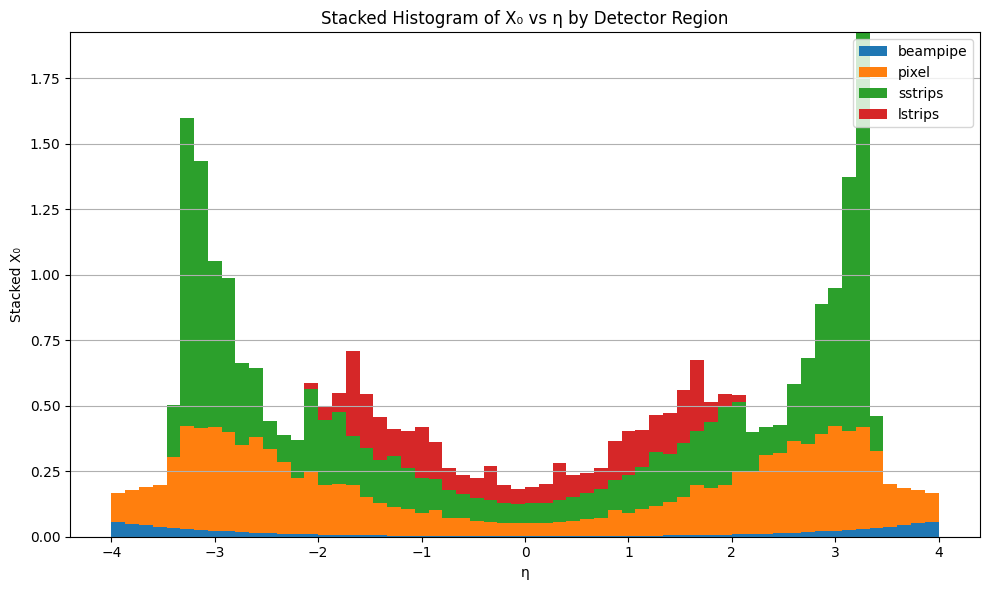

In [ ]:
# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material-map/material_composition.root")


names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
    # "solenoid": "solenoid_x0_vs_eta_all",
    # "ecalbarrel": "ecalbarrel_x0_vs_eta_all",
    # "ecalendcap": "ecalendcap_x0_vs_eta_all",
    # "hcalbarrel": "hcalbarrel_x0_vs_eta_all",
    # "hcalendcap": "hcalendcap_x0_vs_eta_all"
}

# Load all histograms and binning
group_labels = []
group_data = []

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    x0_vals = h.values()
    group_labels.append(label)
    group_data.append(x0_vals)

group_data = np.array(group_data)  # shape: (n_groups, n_bins)
eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
bin_width = np.diff(eta_edges)

plt.figure(figsize=(10, 6))
bottom = np.zeros_like(eta_centers)

# colors = ['blue', 'orange', 'green', 'red'] 
for i, (label, x0_vals) in enumerate(zip(group_labels, group_data)):
    plt.bar(
        eta_centers,
        x0_vals,
        width=bin_width,
        bottom=bottom,
        label=label,
        align="center",
        # color=colors[i % len(colors)],
    )
    bottom += x0_vals  # stack

plt.xlabel("η")
plt.ylabel("Stacked X₀")
plt.title("Stacked Histogram of X₀ vs η by Detector Region")
plt.legend(loc="upper right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("x0_vs_eta_stacked_hist.png")
plt.show()


In [ ]:
import numpy as np

# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material_composition.root")

names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
}

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
    x0 = h.values()

    eta0_index = np.digitize([0], eta_edges) - 1  # subtract 1 to get left bin index
    eta0_index = eta0_index[0]

    print(f"{label:10s} -> η = 0 is in bin centered at {eta_centers[eta0_index]:+.3f}, x0 = {x0[eta0_index]:.8f}")


beampipe   -> η = 0 is in bin centered at +0.067, x0 = 0.00227454
pixel      -> η = 0 is in bin centered at +0.067, x0 = 0.04911038
sstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.07564987
lstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.06150088


In [6]:

# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material_composition.root")
eta0 = 0

for key in f.keys():
    name = key.rstrip(";1")

    if not name.endswith("_x0_vs_eta_all") and "_x0_vs_eta_" in name:
        h = f[key]
        eta_edges = h.axis().edges()
        eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
        x0 = h.values()

        # Find bin that contains η = 0
        eta0_index = np.digitize([eta0], eta_edges) - 1
        eta0_index = eta0_index[0]

        print(f"{name:35s} | η ≈ {eta_centers[eta0_index]:+.3f} | x0 = {x0[eta0_index]:.6f}")


beampipe_x0_vs_eta_A9               | η ≈ +0.067 | x0 = 0.002275
pixel_x0_vs_eta_A12                 | η ≈ +0.067 | x0 = 0.032626
pixel_x0_vs_eta_A13                 | η ≈ +0.067 | x0 = 0.003626
pixel_x0_vs_eta_A27                 | η ≈ +0.067 | x0 = 0.000562
pixel_x0_vs_eta_A28                 | η ≈ +0.067 | x0 = 0.006518
pixel_x0_vs_eta_A48                 | η ≈ +0.067 | x0 = 0.005737
pixel_x0_vs_eta_A64                 | η ≈ +0.067 | x0 = 0.000041
sstrips_x0_vs_eta_A12               | η ≈ +0.067 | x0 = 0.045204
sstrips_x0_vs_eta_A13               | η ≈ +0.067 | x0 = 0.004096
sstrips_x0_vs_eta_A27               | η ≈ +0.067 | x0 = 0.002609
sstrips_x0_vs_eta_A28               | η ≈ +0.067 | x0 = 0.009934
sstrips_x0_vs_eta_A48               | η ≈ +0.067 | x0 = 0.005782
sstrips_x0_vs_eta_A64               | η ≈ +0.067 | x0 = 0.008024
lstrips_x0_vs_eta_A12               | η ≈ +0.067 | x0 = 0.035864
lstrips_x0_vs_eta_A13               | η ≈ +0.067 | x0 = 0.004052
lstrips_x0_vs_eta_A27    